# Discovering Spatial Frequent patterns in Big Data Using SpatialECLAT Algorithm

In this tutorial, we will discuss two approaches to find Spatial Frequent patterns in big data using SpatialECLAT algorithm.

1. [__Basic approach:__](#basicApproach) Here, we present the steps to discover Spatial Frequent patterns using a single minimum support value
2. [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Spatial Frequent patterns using multiple minimum support values.

***

## <a id='basicApproach'>Basic approach: Executing SpatialECLAT on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the SpatialECLAT algorithm

In [1]:
from PAMI.georeferencedFrequentPattern.basic import SpatialECLAT  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.
neighborFile='T10_utility_neighbour.txt'
seperator='\t'       

#### Step 3: Execute the SpatialECLAT algorithm

In [3]:
obj = alg.SpatialECLAT(iFile=inputFile, minSup=minimumSupportCount,nFile=neighborFile, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.savePatterns(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 4300


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 38.03338432312012


In [8]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 242855936
Memory (USS): 204525568


# Advanced Tutorial on Implementing SpatialECLAT Algorithm

***

#### Step 1: Import the SpatialECLAT algorithm and pandas data frame

In [1]:
from PAMI.georeferencedFrequentPattern.basic import SpatialECLAT  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
neighborFile='T10_utility_neighbour.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of SpatialECLAT algorithm

#### Step 3: Execute the SpatialECLAT algorithm using a for loop

In [3]:
algorithm = 'SpatialECLAT'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.SpatialECLAT('https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv', minSup=minSupCount,nFile=neighborFile, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm


In [4]:
print(result)

      algorithm  minSup  patterns    runtime     memory
0  SpatialECLAT     100      4300  39.124038  244211712
1  SpatialECLAT     150      2971  23.278850  244662272
2  SpatialECLAT     200      2291  18.359012  244826112
3  SpatialECLAT     250      1798  15.450596  244842496
4  SpatialECLAT     300      1440  13.883977  244600832


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

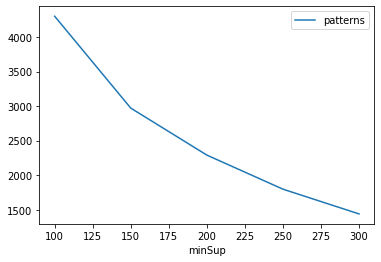

Graph for No Of Patterns is successfully generated!


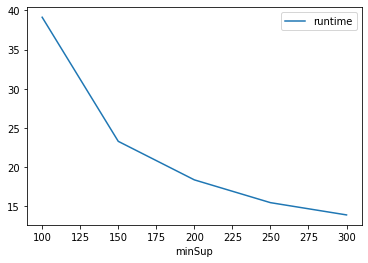

Graph for Runtime taken is successfully generated!


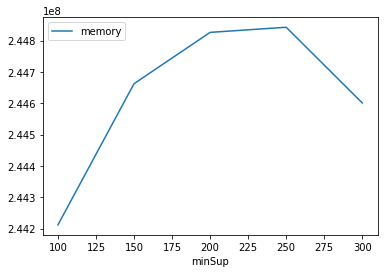

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
